In [7]:
# Add relevant Jupyter notebook extensions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# You can double-check your Python path like this...
import sys
print("\n".join(sys.path))

c:\Users\cvest\Claudio\Oxford\3rd Year\B1\b1-coding-practical-mt24\notebooks
C:\Users\cvest\Claudio\Oxford\3rd Year\B1\b1-coding-practical-mt24
c:\Users\cvest\anaconda3\envs\a2e\python311.zip
c:\Users\cvest\anaconda3\envs\a2e\DLLs
c:\Users\cvest\anaconda3\envs\a2e\Lib
c:\Users\cvest\anaconda3\envs\a2e

c:\Users\cvest\anaconda3\envs\a2e\Lib\site-packages
c:\Users\cvest\anaconda3\envs\a2e\Lib\site-packages\win32
c:\Users\cvest\anaconda3\envs\a2e\Lib\site-packages\win32\lib
c:\Users\cvest\anaconda3\envs\a2e\Lib\site-packages\Pythonwin


AttributeError: 'Submarine' object has no attribute 'position'

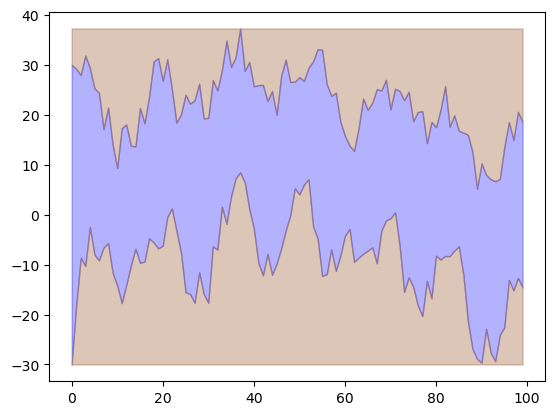

In [22]:
"""
# Script to test Mission class
from uuv_mission import Submarine, Mission, Trajectory

submarine = Submarine()
random_mission = Mission.random_mission(duration=100, scale=40)
mission = Mission.from_csv('C:/Users/cvest/Claudio/Oxford/3rd Year/B1/b1-coding-practical-mt24/data/mission.csv')
Trajectory.plot_completed_mission(submarine, mission)
"""

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

In [9]:
"""
# Import relevant modules
from uuv_mission import Submarine, Trajectory, Mission, ClosedLoop

sub = Submarine()
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("path/to/file") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)
"""

'\n# Import relevant modules\nfrom uuv_mission import Submarine, Trajectory, Mission, ClosedLoop\n\nsub = Submarine()\n# Instantiate your controller (depending on your implementation)\nclosed_loop = ClosedLoop(sub, controller)\nmission = Mission.from_csv("path/to/file") # You must implement this method in the Mission class\n\ntrajectory = closed_loop.simulate_with_random_disturbances(mission)\ntrajectory.plot_completed_mission(mission)\n'